In [1]:
library(ggplot2)
library(gridExtra)
library(scales)
library(dplyr)
library(glue)
library(stringr)
library(comprehenr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## es1

In [2]:
file = "../data/Global_Mobility_Report.csv"
# file_it = "../data/Region_Mobility_Report_CSVs/2020_IT_Region_Mobility_Report.csv"

In [3]:
world_df <- read.csv(file)
str(world_df)

'data.frame':	9673060 obs. of  15 variables:
 $ country_region_code                               : chr  "AE" "AE" "AE" "AE" ...
 $ country_region                                    : chr  "United Arab Emirates" "United Arab Emirates" "United Arab Emirates" "United Arab Emirates" ...
 $ sub_region_1                                      : chr  "" "" "" "" ...
 $ sub_region_2                                      : chr  "" "" "" "" ...
 $ metro_area                                        : chr  "" "" "" "" ...
 $ iso_3166_2_code                                   : chr  "" "" "" "" ...
 $ census_fips_code                                  : int  NA NA NA NA NA NA NA NA NA NA ...
 $ place_id                                          : chr  "ChIJvRKrsd9IXj4RpwoIwFYv0zM" "ChIJvRKrsd9IXj4RpwoIwFYv0zM" "ChIJvRKrsd9IXj4RpwoIwFYv0zM" "ChIJvRKrsd9IXj4RpwoIwFYv0zM" ...
 $ date                                              : chr  "2020-02-15" "2020-02-16" "2020-02-17" "2020-02-18" ...
 $ retail_and_rec

In [4]:
attributes(world_df)$names

[1] "country_region_code"                               
 [2] "country_region"                                    
 [3] "sub_region_1"                                      
 [4] "sub_region_2"                                      
 [5] "metro_area"                                        
 [6] "iso_3166_2_code"                                   
 [7] "census_fips_code"                                  
 [8] "place_id"                                          
 [9] "date"                                              
[10] "retail_and_recreation_percent_change_from_baseline"
[11] "grocery_and_pharmacy_percent_change_from_baseline" 
[12] "parks_percent_change_from_baseline"                
[13] "transit_stations_percent_change_from_baseline"     
[14] "workplaces_percent_change_from_baseline"           
[15] "residential_percent_change_from_baseline"

In [5]:
Country = c("IT","DE","FR")
it_df <- filter(world_df, country_region_code == Country[1])
de_df <- filter(world_df, country_region_code == Country[2])
fr_df <- filter(world_df, country_region_code == Country[3])

In [6]:
# add week and month column
install.packages("lubridate")
library("lubridate")
it_df$week = lubridate::week(it_df$date)
it_df$month = lubridate::month(it_df$date)

de_df$week = lubridate::week(de_df$date)
de_df$month = lubridate::month(de_df$date)

fr_df$week = lubridate::week(fr_df$date)
fr_df$month = lubridate::month(fr_df$date)


Installing package into ‘/home/pietro/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [7]:
it_df

country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,week,month
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
IT,Italy,,,,,NA,ChIJA9KNRIL-1BIRb15jJFz1LOI,2020-02-15,3,-1,35,9,0,-1,7,2
IT,Italy,,,,,NA,ChIJA9KNRIL-1BIRb15jJFz1LOI,2020-02-16,3,2,26,11,1,-2,7,2
IT,Italy,,,,,NA,ChIJA9KNRIL-1BIRb15jJFz1LOI,2020-02-17,0,1,7,3,1,0,7,2
IT,Italy,,,,,NA,ChIJA9KNRIL-1BIRb15jJFz1LOI,2020-02-18,3,1,16,4,1,0,7,2
IT,Italy,,,,,NA,ChIJA9KNRIL-1BIRb15jJFz1LOI,2020-02-19,0,-1,11,3,1,0,8,2
IT,Italy,,,,,NA,ChIJA9KNRIL-1BIRb15jJFz1LOI,2020-02-20,2,1,18,5,1,0,8,2
IT,Italy,,,,,NA,ChIJA9KNRIL-1BIRb15jJFz1LOI,2020-02-21,1,1,19,5,0,-1,8,2
IT,Italy,,,,,NA,ChIJA9KNRIL-1BIRb15jJFz1LOI,2020-02-22,-1,3,30,8,0,-1,8,2
IT,Italy,,,,,NA,ChIJA9KNRIL-1BIRb15jJFz1LOI,2020-02-23,-5,16,23,6,1,0,8,2


## Weeks

In [8]:
library(sqldf)
#let's group by week: using sql language
it_df_week <- sqldf("SELECT week, 
                    AVG(retail_and_recreation_percent_change_from_baseline) AS rr, 
                    AVG(grocery_and_pharmacy_percent_change_from_baseline) AS gp,
                    AVG(parks_percent_change_from_baseline) AS pp,
                    AVG(transit_stations_percent_change_from_baseline) AS ts,
                    AVG(workplaces_percent_change_from_baseline) AS wp,
                    AVG(residential_percent_change_from_baseline) AS rp  
                    FROM it_df 
                    GROUP BY week ")
de_df_week <- sqldf("SELECT week, 
                    AVG(retail_and_recreation_percent_change_from_baseline) AS rr, 
                    AVG(grocery_and_pharmacy_percent_change_from_baseline) AS gp,
                    AVG(parks_percent_change_from_baseline) AS pp,
                    AVG(transit_stations_percent_change_from_baseline) AS ts,
                    AVG(workplaces_percent_change_from_baseline) AS wp,
                    AVG(residential_percent_change_from_baseline) AS rp  
                    FROM de_df 
                    GROUP BY week ")
fr_df_week <- sqldf("SELECT week, 
                    AVG(retail_and_recreation_percent_change_from_baseline) AS rr, 
                    AVG(grocery_and_pharmacy_percent_change_from_baseline) AS gp,
                    AVG(parks_percent_change_from_baseline) AS pp,
                    AVG(transit_stations_percent_change_from_baseline) AS ts,
                    AVG(workplaces_percent_change_from_baseline) AS wp,
                    AVG(residential_percent_change_from_baseline) AS rp  
                    FROM fr_df 
                    GROUP BY week ")

Loading required package: gsubfn

Loading required package: proto

Loading required package: RSQLite



In [9]:
#example of df
it_df_week

week,rr,gp,pp,ts,wp,rp
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-38.790776,-10.1867267,-3.1393119,-42.7639363,-47.52643,17.07705287
2,-30.595613,2.7204724,-15.9791784,-35.3507675,-21.95107,10.96569179
3,-31.397075,-1.0523060,-11.7450760,-35.5699659,-21.85208,9.59392576
4,-30.713723,-0.2418448,-13.3190771,-34.5719159,-20.45107,9.53599550
5,-25.446007,2.6912261,-2.4617117,-30.6178815,-18.06693,7.98481440
6,-22.491564,3.1552306,2.4825450,-27.6438746,-16.46344,6.89088864
7,-16.158355,2.8394576,6.9320771,-19.5384956,-12.64261,5.30284464
8,-14.163480,4.7604049,19.2136688,-15.0663885,-10.71691,4.28432108
9,-18.030746,2.9805024,8.6863261,-21.6169890,-12.96100,5.73330833


In [10]:
#build a dataframe containing all the data from the three different selected counrties
tot_df_week <- data.frame(
    week = c(it_df_week$week, de_df_week$week, fr_df_week$week),
    rr = c(it_df_week$rr, de_df_week$rr, fr_df_week$rr),
    gp = c(it_df_week$gp, de_df_week$gp, fr_df_week$gp),
    pp = c(it_df_week$pp, de_df_week$pp, fr_df_week$pp),
    ts = c(it_df_week$ts, de_df_week$ts, fr_df_week$ts),
    wp = c(it_df_week$wp, de_df_week$wp, fr_df_week$wp),
    rp = c(it_df_week$rp, de_df_week$rp, fr_df_week$rp),
    country_code = c(rep("IT", length(it_df_week$week)), rep("DE", length(de_df_week$week)), rep("FR", length(fr_df_week$week)))
)

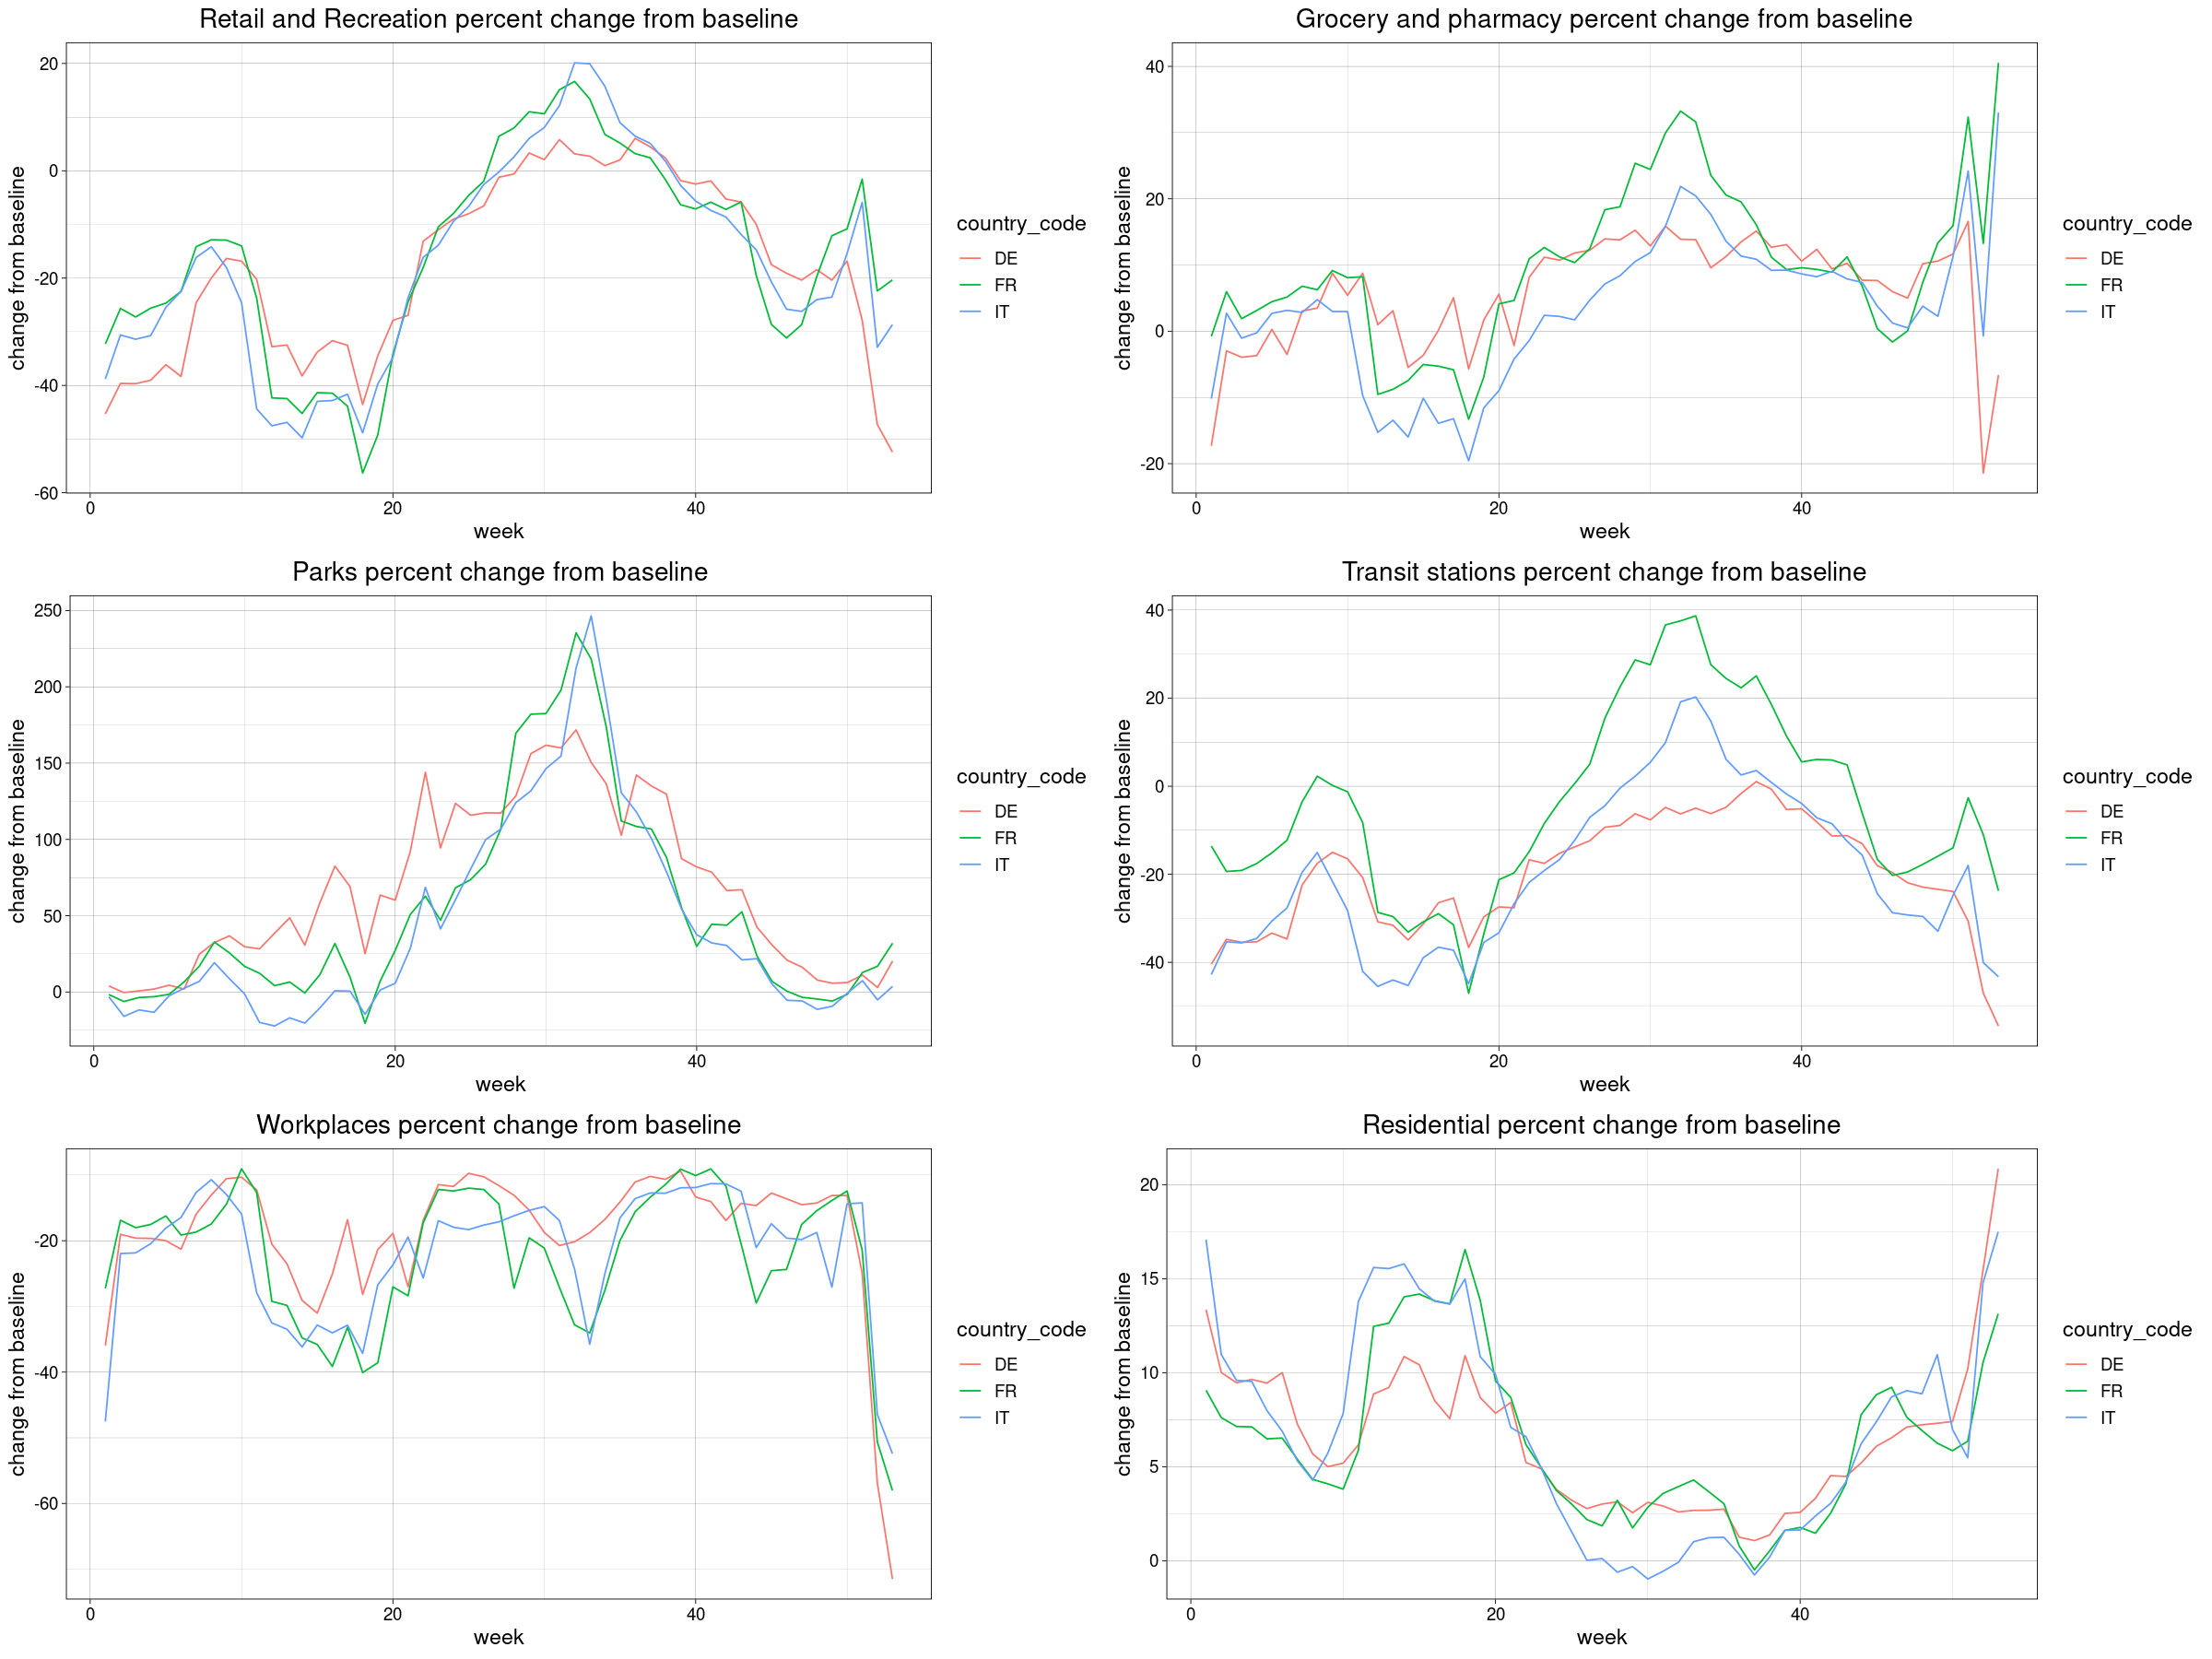

In [11]:
plot_rr <- ggplot(data=tot_df_week, aes(x=week, y=rr))+
            theme_linedraw() +
            geom_line(aes(color=country_code)) +
            labs(x="week", y="change from baseline", title="Retail and Recreation percent change from baseline")+
            theme(plot.title = element_text(hjust = 0.5),text = element_text(size=14))

plot_gp <- ggplot(data=tot_df_week, aes(x=week, y=gp))+
            theme_linedraw() +
            geom_line(aes(color=country_code)) +
            labs(x="week", y="change from baseline", title="Grocery and pharmacy percent change from baseline")+
            theme(plot.title = element_text(hjust = 0.5),text = element_text(size=14))

plot_pp <- ggplot(data=tot_df_week, aes(x=week, y=pp))+
            theme_linedraw() +
            geom_line(aes(color=country_code)) +
            labs(x="week", y="change from baseline", title="Parks percent change from baseline")+
            theme(plot.title = element_text(hjust = 0.5),text = element_text(size=14))

plot_ts <- ggplot(data=tot_df_week, aes(x=week, y=ts))+
            theme_linedraw() +
            geom_line(aes(color=country_code)) +
            labs(x="week", y="change from baseline", title="Transit stations percent change from baseline")+
            theme(plot.title = element_text(hjust = 0.5),text = element_text(size=14))

plot_wp <- ggplot(data=tot_df_week, aes(x=week, y=wp))+
            theme_linedraw() +
            geom_line(aes(color=country_code)) +
            labs(x="week", y="change from baseline", title="Workplaces percent change from baseline")+
            theme(plot.title = element_text(hjust = 0.5),text = element_text(size=14))

plot_rp <- ggplot(data=tot_df_week, aes(x=week, y=rp))+
            theme_linedraw() +
            geom_line(aes(color=country_code)) +
            labs(x="week", y="change from baseline", title="Residential percent change from baseline")+
            theme(plot.title = element_text(hjust = 0.5),text = element_text(size=14))

options(repr.plot.width=20, repr.plot.height=15)

grid.arrange(plot_rr, plot_gp, plot_pp, plot_ts, plot_wp, plot_rp, ncol=)


## Months

In [12]:
#let's repeat all the procedure but now grouping by months
it_df_month <- sqldf("SELECT month, 
                    AVG(retail_and_recreation_percent_change_from_baseline) AS rr, 
                    AVG(grocery_and_pharmacy_percent_change_from_baseline) AS gp,
                    AVG(parks_percent_change_from_baseline) AS pp,
                    AVG(transit_stations_percent_change_from_baseline) AS ts,
                    AVG(workplaces_percent_change_from_baseline) AS wp,
                    AVG(residential_percent_change_from_baseline) AS rp  
                    FROM it_df 
                    GROUP BY month ")
de_df_month <- sqldf("SELECT month, 
                    AVG(retail_and_recreation_percent_change_from_baseline) AS rr, 
                    AVG(grocery_and_pharmacy_percent_change_from_baseline) AS gp,
                    AVG(parks_percent_change_from_baseline) AS pp,
                    AVG(transit_stations_percent_change_from_baseline) AS ts,
                    AVG(workplaces_percent_change_from_baseline) AS wp,
                    AVG(residential_percent_change_from_baseline) AS rp  
                    FROM de_df 
                    GROUP BY month ")
fr_df_month <- sqldf("SELECT month, 
                    AVG(retail_and_recreation_percent_change_from_baseline) AS rr, 
                    AVG(grocery_and_pharmacy_percent_change_from_baseline) AS gp,
                    AVG(parks_percent_change_from_baseline) AS pp,
                    AVG(transit_stations_percent_change_from_baseline) AS ts,
                    AVG(workplaces_percent_change_from_baseline) AS wp,
                    AVG(residential_percent_change_from_baseline) AS rp  
                    FROM fr_df 
                    GROUP BY month ")
#example
it_df_month

month,rr,gp,pp,ts,wp,rp
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-32.792482,-2.267717,-10.555810,-36.735226,-27.01816,11.4914910
2,-17.576023,3.530553,9.677143,-20.914843,-13.39337,5.5734886
3,-38.532300,-7.759292,-13.270429,-38.236116,-25.99941,12.4509887
4,-44.206897,-12.428442,-8.022812,-39.656737,-33.91909,14.4432737
5,-33.611125,-9.936754,12.340247,-32.436562,-24.58725,9.6255725
6,-8.344226,2.305249,73.738338,-14.571486,-19.64134,2.8796953
7,4.408560,9.598679,128.470505,1.067727,-16.26772,-0.4337992
8,16.210932,18.511781,195.436836,15.577352,-24.23986,0.5805058
9,3.034893,10.605368,86.432348,1.118637,-13.17020,0.4571354


In [13]:
tot_df_month <- data.frame(
    month = c(it_df_month$month, de_df_month$month, fr_df_month$month),
    rr = c(it_df_month$rr, de_df_month$rr, fr_df_month$rr),
    gp = c(it_df_month$gp, de_df_month$gp, fr_df_month$gp),
    pp = c(it_df_month$pp, de_df_month$pp, fr_df_month$pp),
    ts = c(it_df_month$ts, de_df_month$ts, fr_df_month$ts),
    wp = c(it_df_month$wp, de_df_month$wp, fr_df_month$wp),
    rp = c(it_df_month$rp, de_df_month$rp, fr_df_month$rp),
    country_code = c(rep("IT", length(it_df_month$month)), rep("DE", length(de_df_month$month)), rep("FR", length(fr_df_month$month)))
)

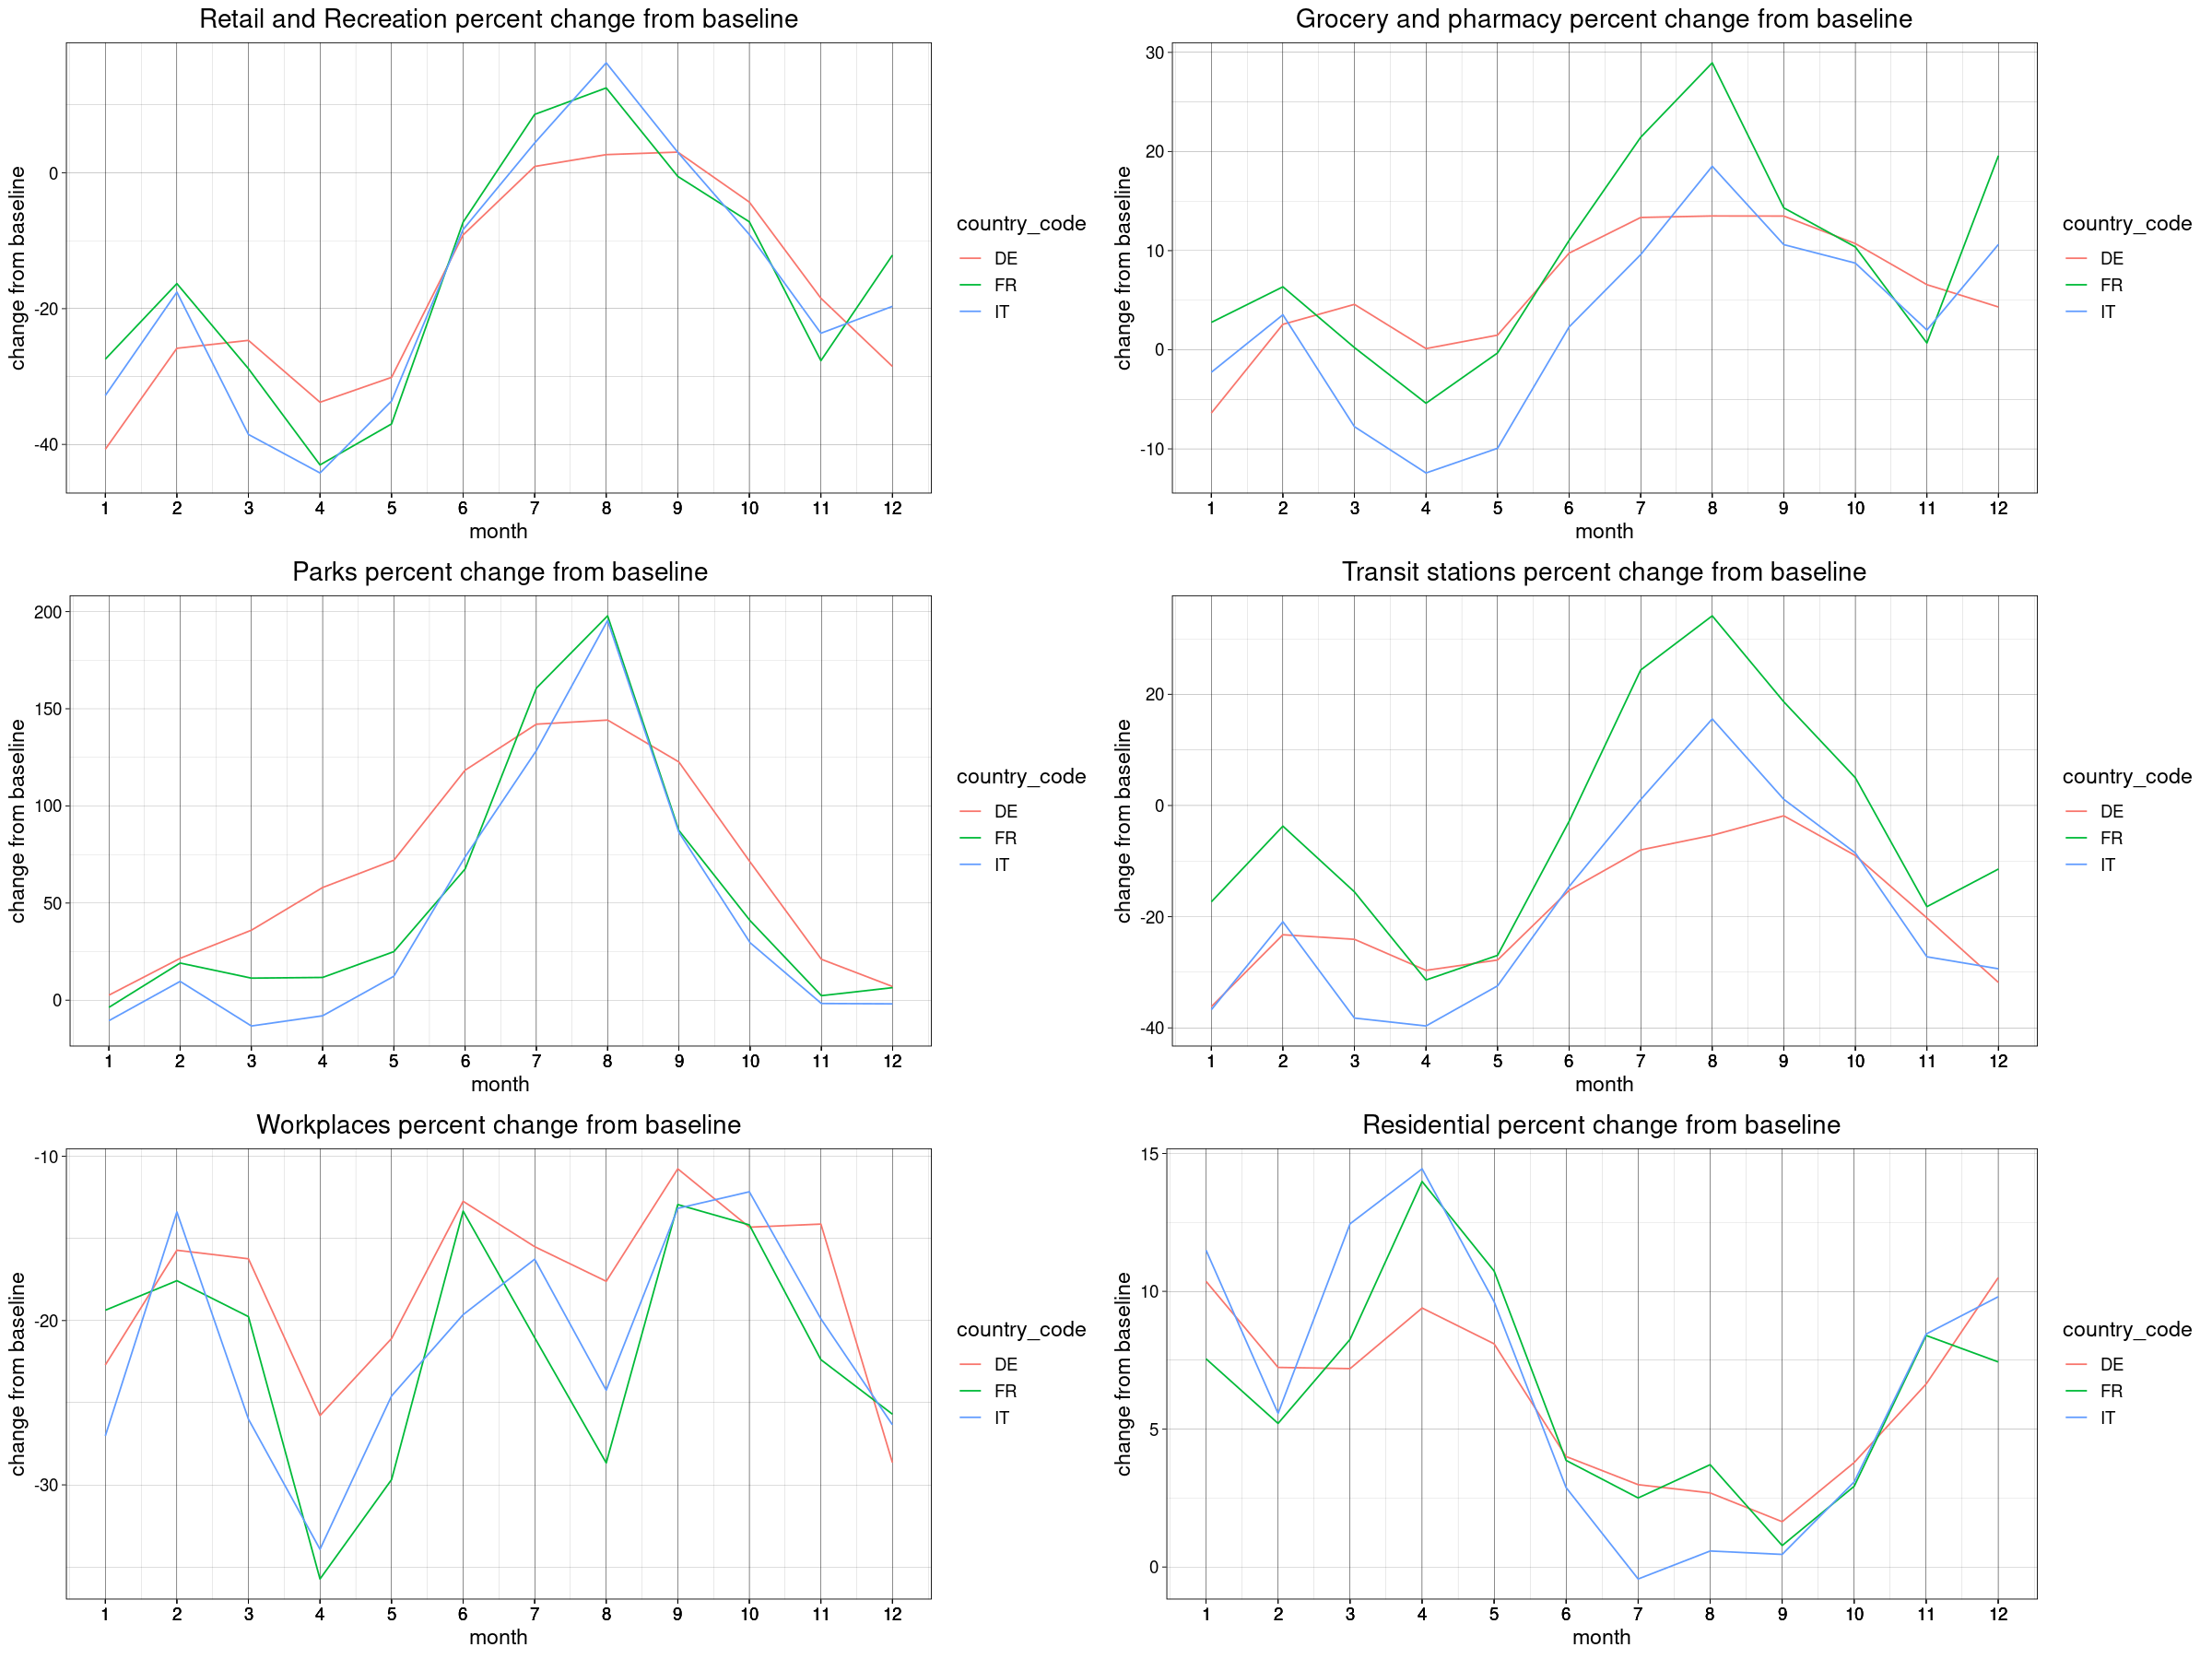

In [14]:
plot_rr <- ggplot(data=tot_df_month, aes(x=month, y=rr))+
            theme_linedraw() +
            geom_line(aes(color=country_code)) +
            labs(x="month", y="change from baseline", title="Retail and Recreation percent change from baseline")+
            theme(plot.title = element_text(hjust = 0.5),text = element_text(size=14))+
            scale_x_continuous(breaks = tot_df_month$month)


plot_gp <- ggplot(data=tot_df_month, aes(x=month, y=gp))+
            theme_linedraw() +
            geom_line(aes(color=country_code)) +
            labs(x="month", y="change from baseline", title="Grocery and pharmacy percent change from baseline")+
            theme(plot.title = element_text(hjust = 0.5),text = element_text(size=14))+
            scale_x_continuous(breaks = tot_df_month$month)


plot_pp <- ggplot(data=tot_df_month, aes(x=month, y=pp))+
            theme_linedraw() +
            geom_line(aes(color=country_code)) +
            labs(x="month", y="change from baseline", title="Parks percent change from baseline")+
            theme(plot.title = element_text(hjust = 0.5),text = element_text(size=14))+
            scale_x_continuous(breaks = tot_df_month$month)


plot_ts <- ggplot(data=tot_df_month, aes(x=month, y=ts))+
            theme_linedraw() +
            geom_line(aes(color=country_code)) +
            labs(x="month", y="change from baseline", title="Transit stations percent change from baseline")+
            theme(plot.title = element_text(hjust = 0.5),text = element_text(size=14))+
            scale_x_continuous(breaks = tot_df_month$month)


plot_wp <- ggplot(data=tot_df_month, aes(x=month, y=wp))+
            theme_linedraw() +
            geom_line(aes(color=country_code)) +
            labs(x="month", y="change from baseline", title="Workplaces percent change from baseline")+
            theme(plot.title = element_text(hjust = 0.5),text = element_text(size=14))+
            scale_x_continuous(breaks = tot_df_month$month)


plot_rp <- ggplot(data=tot_df_month, aes(x=month, y=rp))+
            theme_linedraw() +
            geom_line(aes(color=country_code)) +
            labs(x="month", y="change from baseline", title="Residential percent change from baseline")+
            theme(plot.title = element_text(hjust = 0.5),text = element_text(size=14))+
            scale_x_continuous(breaks = tot_df_month$month)


options(repr.plot.width=20, repr.plot.height=15)

grid.arrange(plot_rr, plot_gp, plot_pp, plot_ts, plot_wp, plot_rp, ncol=)


## es2 - Random Number Generator
Middle-square algorithm


In [136]:
#function to extract the center of a number
center <- function(x,n) {

#   x is the starting number
#   n is the nubmber of iterations

    x_char <- unlist(strsplit(as.character(format(x, scientific=FALSE)),""))
    x2_char <- unlist(strsplit(as.character(format(x^2, scientific=FALSE)),""))
    x_len <- length(x_char)
    x2_len <- length(x2_char)
    x_half <- as.integer(x_len/2)
    x2_half <- as.integer(x2_len/2)
    if(x_len%%2==0){ #lunghezza di x è pari
    res <- x2_char[(x2_half - x_half + 1):(x2_half + x_half)]
        }else{ #lunghezza di x è dispari
    res <- x2_char[(x2_half - x_half):(x2_half + x_half)]
    }
    # return(res)
    return(as.numeric(paste(res, collapse="")))
}


Middle_squared <- function(x,n) {
    #arguments: 
#   x is the starting number
#   n is the nubmber of iterations

    k <- length(unlist(strsplit(as.character(format(x, scientific=FALSE)),"")))

    for (i in 1:n){
        x = center(x)
        if (length(unlist(strsplit(as.character(format(x, scientific=FALSE)),"")))<k){
            x = x*10
        }
    }
    return(x)
}

In [141]:
#some examples to see how it works
x <- 123078005
center(x)
Middle_squared(x,1)
Middle_squared(x,2)
Middle_squared(x,11)

[1] 481953147

[1] 481953147

[1] 788359032

[1] 331546590

## es3 - Bayesian Inference

1) The problem give us the data: from 150 peolple only 29 has read the journal. This means that we know something about the likelihood which means that the y distribution is the Likelihood pdf. So we had to estimate y. The given data can be seen as Bernoulli trials: we ask 150 independent people if they have or have not read the journal. 29 of them give positive result: so in this way we have 29 success in 150 independent trials. For this reason we assume y as $Binomial$ Distribution with an unknown parameter p.

2) From the Bayes' Theorem we have:
\begin{equation}
posterior = \frac{likelihood  \times prior}{evidence}
\end{equation}
where evidence is a constant (normalization factor). If we assume a uniform prior we can see it as a constant too because it doesn't influence the posterior distribution. So we obtain:
\begin{equation}
posterior \propto likelihood
\end{equation}
which means that posterior pdf and likelihood pdf are the same distribution function.

3) Likelihood: $Binomial(x=29, n=150, p) $ , Posterior:
\begin{equation}
posterior = \frac{Binomial(x=29, n=150, p)}{\int_0 ^1 Binomial(x=29, n=150, p)dp}
\end{equation}


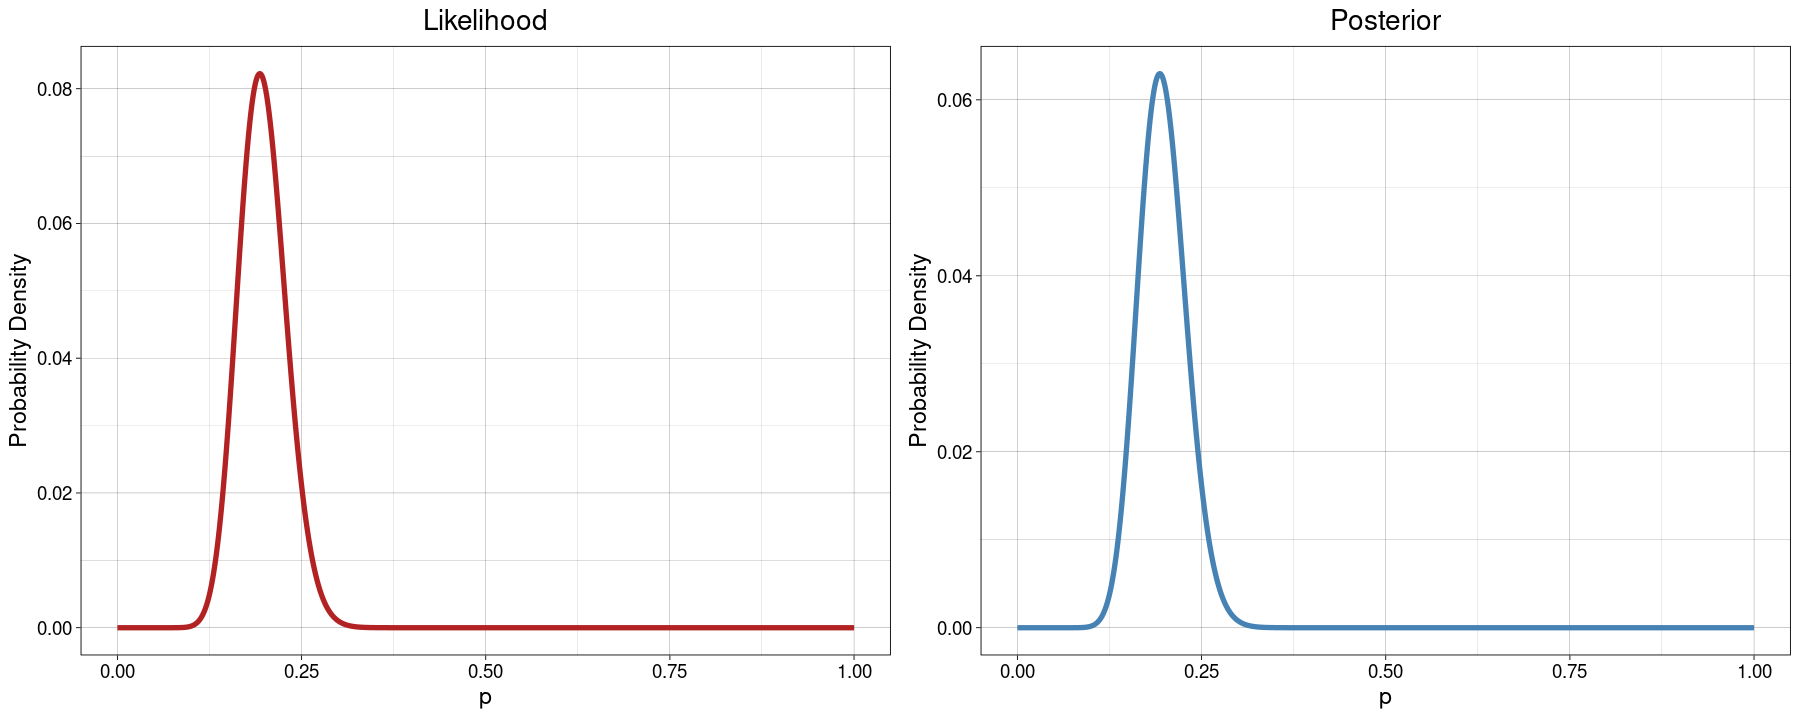

In [4]:
x <- 29
n <- 150
# for the unknow prob p we take a sequence
p <- seq(0,1, length.out = 1000)

likelihood <- dbinom(x,n,p)
posterior <- likelihood / sum(likelihood*p)

options(repr.plot.width=15, repr.plot.height=6)
likel_plot <- ggplot()+
        geom_line(aes(x=p, y=likelihood), color="firebrick",lwd=1.5) + 
        theme_linedraw() +
        labs(title="Likelihood", x="p", y="Probability Density")+
        theme(text = element_text(size=14), plot.title = element_text( hjust = 0.5))

post_plot <- ggplot()+
        geom_line(aes(x=p, y=posterior), color="steelblue", lwd=1.5) + 
        theme_linedraw() +
        labs(title="Posterior", x="p", y="Probability Density")+
        theme(text = element_text(size=14), plot.title = element_text( hjust = 0.5))

grid.arrange(likel_plot, post_plot, ncol=2)

## es4 - Bayesian Inference: Flipped Coin

plot prior, likelihood, posterior \
For the problem of Flipped coin, the appropriate Likelihood is the binomial distrib.

\begin{equation}
posterior \propto 
\end{equation}
Every posterior is already normalized

In [4]:
n <- 30
r <- 15 #head
n_sample <- 200
p <- seq(0, 1, length.out = n_sample)

#Likelihhod is the is the same ==> binomial
Likelihood <- dbinom(r, n, p)
norm_likelihood <- Likelihood / sum(Likelihood/n_sample)

#uniform flat prior
flat_prior <- rep(1, n_sample)
norm_factor <- sum(Likelihood/n_sample)
unif_posterior  <- Likelihood / norm_factor


#beta prior
#choosing alpha and beta from personal hypothesis
alpha <- 5; beta  <- 5
beta_prior <- dbeta(p, alpha, beta)
norm_factor <- sum(Likelihood*beta_prior/n_sample)
beta_posterior <- Likelihood*beta_prior / norm_factor


In [6]:
options(repr.plot.width=20, repr.plot.height=10)

plot_unif <- ggplot()+
    geom_line(aes(x=p, y=flat_prior, color="Prior"),lwd=1.5) + #prior
    geom_line(aes(x=p, y=norm_likelihood, color="Likelihood"),lwd=1.5) + #likelihood
    geom_line(aes(x=p, y=unif_posterior, color="Posterior"),lwd=1.5) + #posterior
    scale_color_manual(name = "", values = c("Prior" = "darkblue", "Likelihood" = "red", "Posterior"="orange"))+
    theme_linedraw() +
    labs(title="Uniform Prior", x="p",y="Probability density")+
    theme(text = element_text(size=18), plot.title = element_text( hjust = 0.5))

plot_beta <- ggplot()+
    geom_line(aes(x=p, y=beta_prior, color="Prior"),lwd=1.5) + #prior
    geom_line(aes(x=p, y=norm_likelihood, color="Likelihood"),lwd=1.5) + #likelihood
    geom_line(aes(x=p, y=beta_posterior, color="Posterior"),lwd=1.5) + #posterior
    scale_color_manual(name = "", values = c("Prior" = "darkblue", "Likelihood" = "red", "Posterior"="orange"))+
    theme_linedraw() +
    labs(title="Beta Prior", x="p",y="Probability density")+
    theme(text = element_text(size=18), plot.title = element_text( hjust = 0.5))

# grid.arrange(plot_unif, plot_beta, ncol=2)

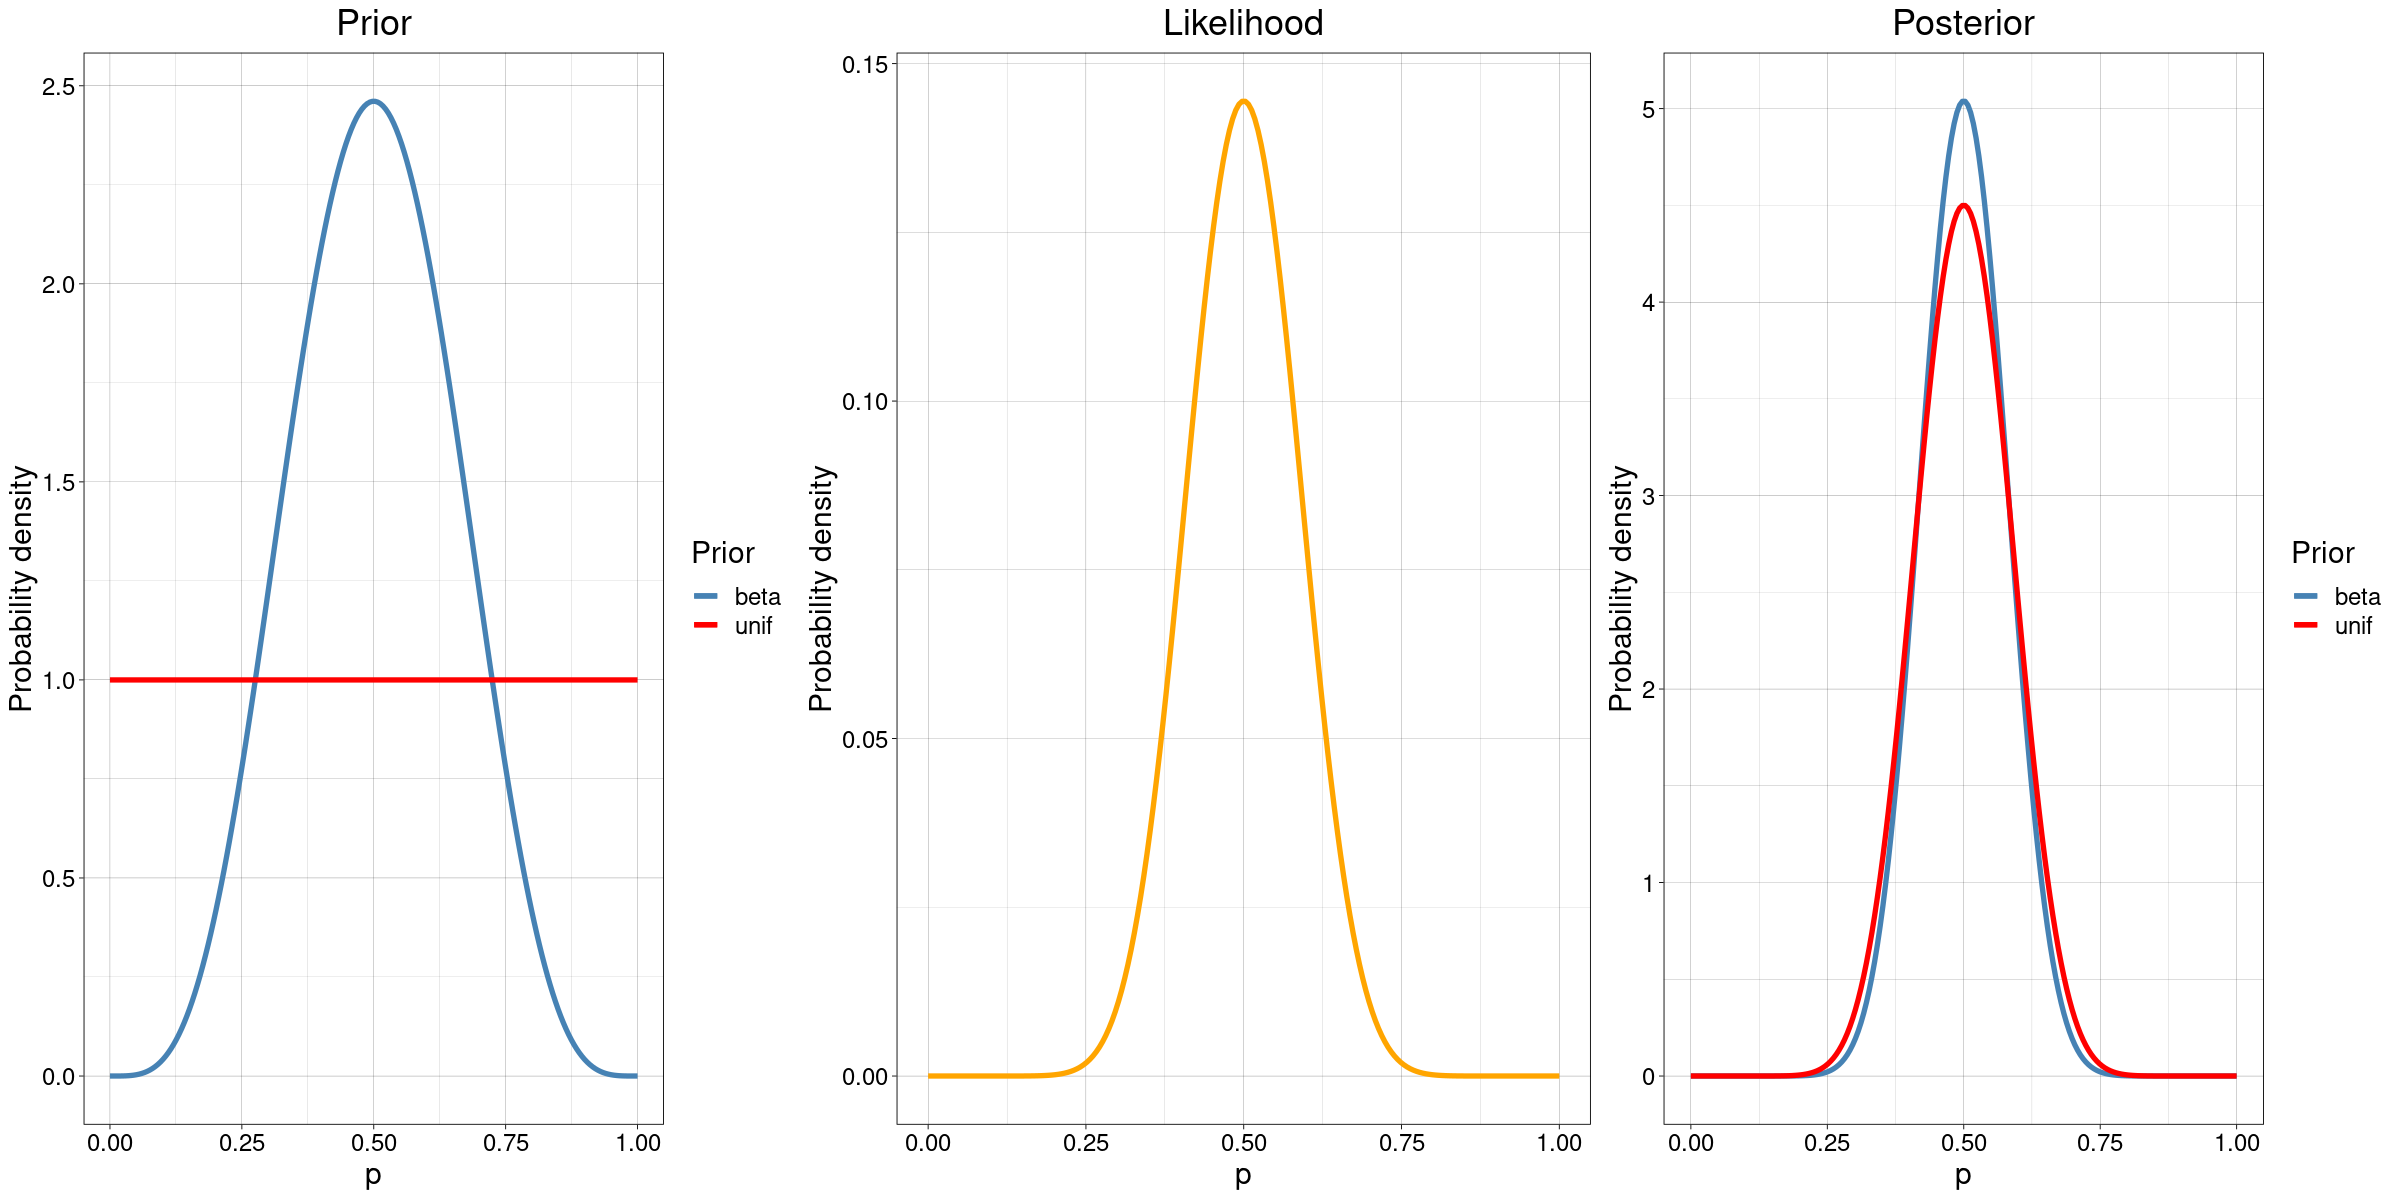

In [23]:
plot_prior <- ggplot()+
    geom_line(aes(x=p, y=beta_prior, color="beta"),lwd=1.5) + 
    geom_line(aes(x=p, y=flat_prior, color="unif"),lwd=1.5) + 
    scale_color_manual(name = "Prior", values = c("beta" = "steelblue", "unif" = "red"))+
    theme_linedraw() +
    labs(title="Prior", x="p",y="Probability density")+
    theme(text = element_text(size=18), plot.title = element_text( hjust = 0.5))
plot_likelihood <- ggplot()+
    geom_line(aes(x=p, y=Likelihood), color="orange",lwd=1.5) + 
    theme_linedraw() +
    labs(title="Likelihood", x="p",y="Probability density")+
    theme(text = element_text(size=18), plot.title = element_text( hjust = 0.5))
plot_posterior <- ggplot()+
    geom_line(aes(x=p, y=beta_posterior, color="beta"),lwd=1.5) + 
    geom_line(aes(x=p, y=unif_posterior, color="unif"),lwd=1.5) + 
    scale_color_manual(name = "Prior", values = c("beta" = "steelblue", "unif" = "red"))+
    theme_linedraw() +
    labs(title="Posterior", x="p",y="Probability density")+
    theme(text = element_text(size=18), plot.title = element_text( hjust = 0.5))

grid.arrange(plot_prior, plot_likelihood, plot_posterior, ncol=3)


In [99]:
#the most probable value for the coin tossing probability
# ==> the one that correspond to the maximum of the posterior
max_p_unif <- p[which(unif_posterior == max(unif_posterior))][1]
max_p_beta <- p[which(beta_posterior == max(beta_posterior))][1]

print("the most probable value for the coin tossing probability is")
cat("\t for the flat prior =", max_p_unif,"\n")
cat("\t for the beta prior =", max_p_beta,"\n")


# 95% of credibility mean that the integral has to be between 2.5% and 97.5%, such that the integral between is 95%
# we calculate the credibility interval as the area between the 2.5% and 97.5%
# so we search the p value that correspond to this "head and tail" boundary
unif_low <- p[cumsum(unif_posterior / n_sample)> 0.025][1]
unif_high <- p[cumsum(unif_posterior / n_sample)> 0.975][1]
beta_low <- p[cumsum(beta_posterior / n_sample)> 0.025][1]
beta_high <- p[cumsum(beta_posterior / n_sample)> 0.975][1]

print("p values for the credibility boundary (95%) are:")
cat("\t for the flat prior: low=", unif_low,"high=",unif_high,"\n")
cat("\t for the beta prior: low=", beta_low,"high=",beta_high,"\n")



[1] "the most probable value for the coin tossing probability is"
	 for the flat prior = 0.4974874 
	 for the beta prior = 0.4974874 
[1] "p values for the credibility boundary (95%) are:"
	 for the flat prior: low= 0.3316583 high= 0.6683417 
	 for the beta prior: low= 0.3467337 high= 0.6532663 


In [7]:
#sequential analisis
coin <- c('T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'H', 'H', 'T', 'T', 'H', 'H', 'H', 'T', 'H', 'T', 'H', 'T', 'H', 'H', 'T', 'H', 'T', 'H', 'T', 'H', 'H', 'H')
n <- length(coin)
n_sample <- 500

unif_post  <- vector(); beta_post  <- vector()
unif <- matrix(, nrow = n_sample, ncol = n) 
beta <- matrix(, nrow = n_sample, ncol = n)

max_p_unif <- vector(); max_p_beta <- vector()
unif_low   <- vector(); unif_high  <- vector()
beta_low   <- vector(); beta_high  <- vector()

#setting prior as before
p <- seq(0, 1, length.out = n_sample)
alpha <- 5; b  <- 5 #we choose alpha and beta equal to have a symmetric distribution

r <- 0; r_ <- vector()
for (i in 1:length(coin)){
    if(coin[i]=="H"){r = r+1}
    r_ <- append(r_, r)

    #as before, likihood is the same for both flat and beta prior
    likelihood <- dbinom(r, i, p)

    #unif
    norm_factor <- (sum(dbinom(x=r, size=i, prob=p))/n_sample)
    unif_posterior  <- dbinom(x=r, size=i, prob=p)/ norm_factor
    unif[,i] <- unif_posterior
    
    
    max_p_unif <- append(max_p_unif, p[which(unif_posterior == max(unif_posterior))][1])
    unif_low   <- append(unif_low,   p[cumsum(unif_posterior / n_sample)> 0.025][1])
    unif_high  <- append(unif_high,  p[cumsum(unif_posterior / n_sample)> 0.975][1])

    #beta
    # norm_factor <- sum(dbinom(r, i, p)*beta_prior/n_sample)
    norm_factor <-(sum(dbeta(p, alpha+r,b+i-r))/n_sample)
    beta_posterior <- dbeta(p, alpha+r,b+i-r)/norm_factor
    beta[,i] <- beta_posterior
    
    max_p_beta <- append(max_p_beta, p[which(beta_posterior == max(beta_posterior))][1])
    beta_low   <- append(beta_low,   p[cumsum(beta_posterior / n_sample)> 0.025][1])
    beta_high  <- append(beta_high,  p[cumsum(beta_posterior / n_sample)> 0.975][1])   
}


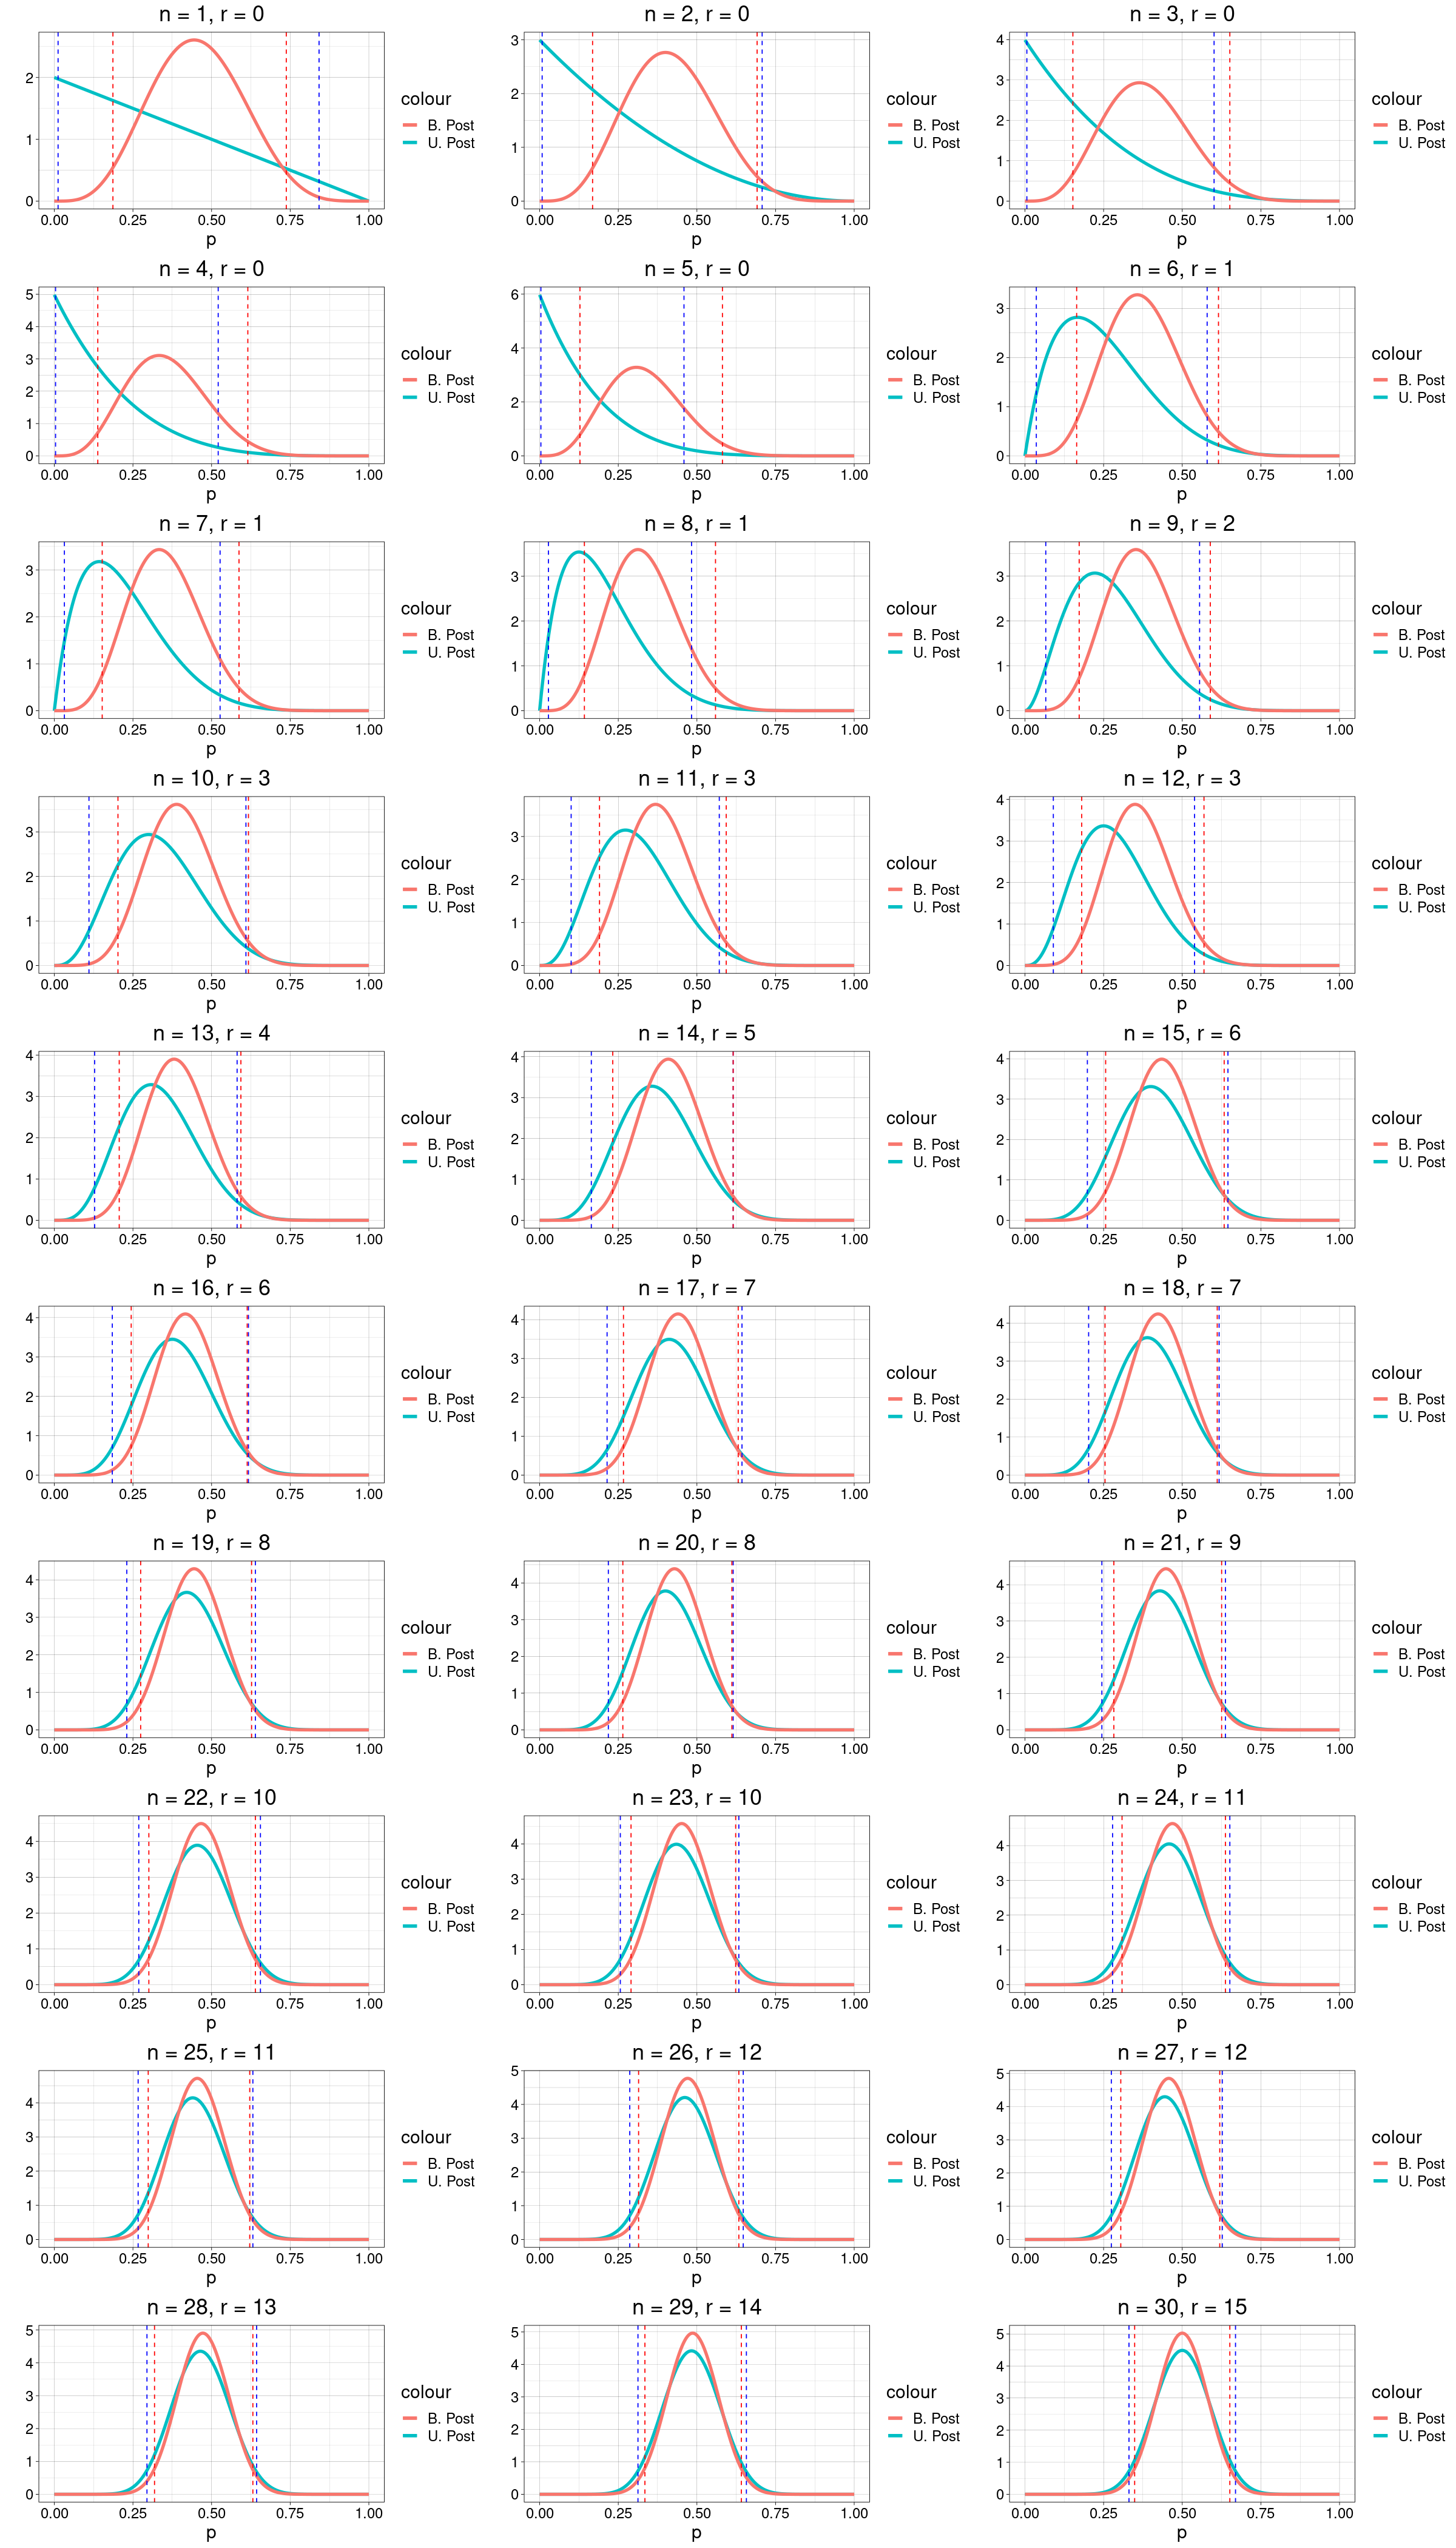

In [6]:
#plot
options(repr.plot.width=20, repr.plot.height=35)
plots <- list()

for (i in 1:30){
    plot <- ggplot() +
            geom_line(aes(x=p, y=unif[,i], color="U. Post"),lwd=1.5) + 
            geom_line(aes(x=p, y=beta[,i], color="B. Post"),lwd=1.5) + 
            geom_vline(xintercept = unif_low[i], linetype="dashed", color="blue") +
            geom_vline(xintercept = unif_high[i],linetype="dashed", color="blue") +
            geom_vline(xintercept = beta_low[i], linetype="dashed", color="red") +
            geom_vline(xintercept = beta_high[i],linetype="dashed", color="red") +
            theme_linedraw() +
            labs(title=glue("n = {i}, r = {r_[i]}"), x="p",y="")+
            theme(text = element_text(size=18), plot.title = element_text( hjust = 0.5))
    
    plots[[i]] = ggplotGrob(plot)
}
grid.arrange(grobs=plots, ncol=3, nrow=)

This plots show the evolution of the posteriors. In this way we can see how much the number of data influence the posterior.

Last we can plot the evolution of the credibility intervals and the most probable p with the increasing number of coin tossed

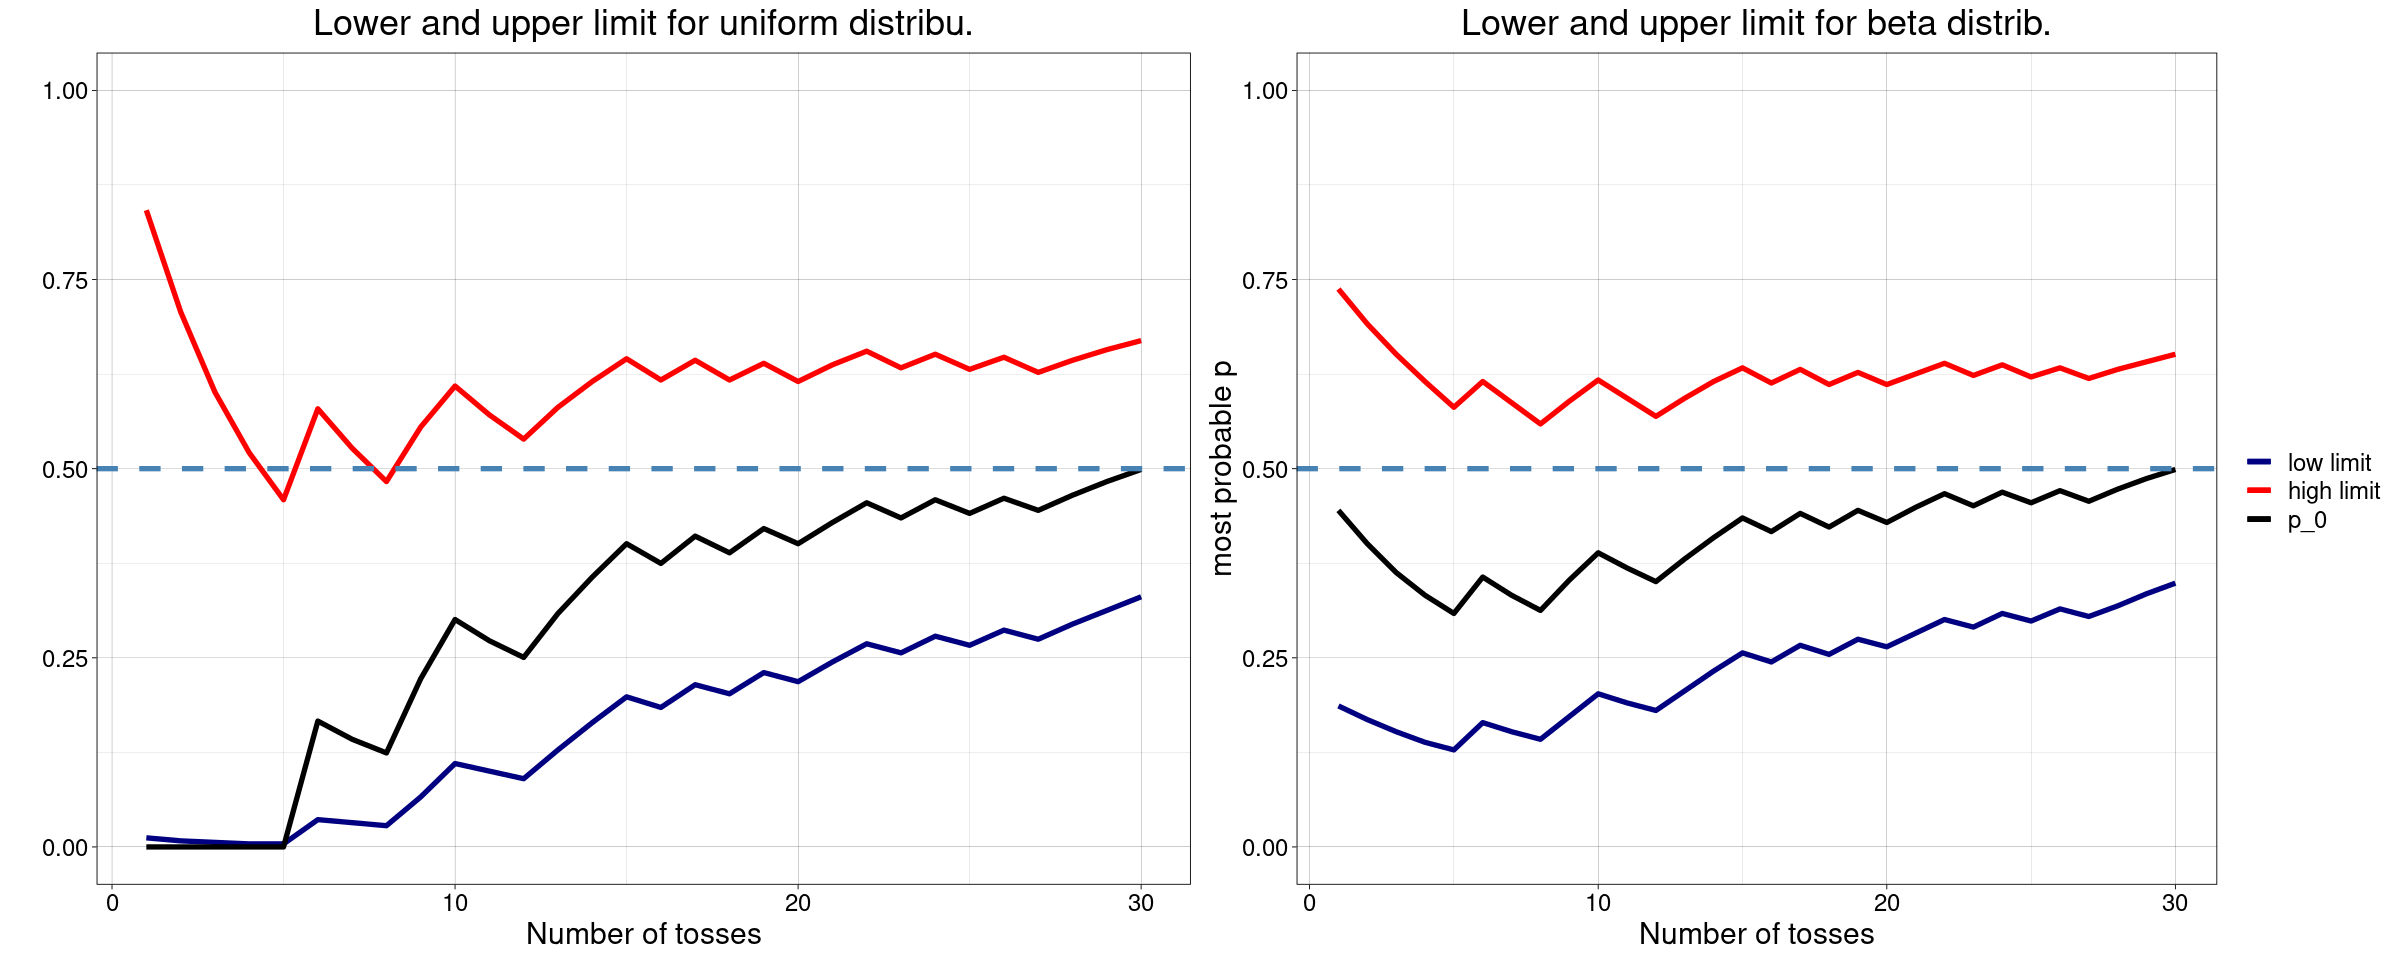

In [89]:
options(repr.plot.width=20, repr.plot.height=8)
x <- 1:30
final_unif_plot <- ggplot() +
        geom_line(aes(x=x, y=unif_low,color="low limit"),lwd=1.5) + 
        geom_line(aes(x=x, y=unif_high,color="high limit"),lwd=1.5) + 
        geom_line(aes(x=x, y=max_p_unif, color="p_0"),lwd=1.5) + 
        geom_hline(yintercept=0.5, linetype="dashed", color="steelblue",lwd=1.5)+
        scale_color_manual(name = "", values = c("low limit" = "navyblue", "high limit" = "red", "p_0"="black"))+
        theme_linedraw() +
        labs(title="Lower and upper limit for uniform distribu.", x="Number of tosses",y="")+
        theme(text = element_text(size=18), plot.title = element_text( hjust = 0.5), legend.position ="none")+
        ylim(0,1)

final_beta_plot <- ggplot() +
        geom_line(aes(x=x, y=beta_low,color="low limit"),lwd=1.5) + 
        geom_line(aes(x=x, y=beta_high,color="high limit"),lwd=1.5) + 
        geom_line(aes(x=x, y=max_p_beta, color="p_0"),lwd=1.5) + 
        geom_hline(yintercept=0.5, linetype="dashed", color="steelblue",lwd=1.5)+
        theme_linedraw() +
        scale_color_manual(name = "", values = c("low limit" = "navyblue", "high limit" = "red", "p_0"="black"))+
        labs(title="Lower and upper limit for beta distrib.", x="Number of tosses",y="most probable p")+
        theme(text = element_text(size=18), plot.title = element_text( hjust = 0.5))+
        ylim(0,1)

grid.arrange(final_unif_plot,final_beta_plot, ncol=2, nrow=)


In [96]:
#the most probable value for the coin tossing probability
print("the most probable value for the coin tossing probability is")
cat("\t for the flat prior =", max_p_unif[length(max_p_unif)],"\n")
cat("\t for the beta prior =", max_p_beta[length(max_p_beta)],"\n")


# # 95% of credibility mean that the integral has to be between 2.5% and 97.5%, such that the integral between is 95%
# # so we search the p value that correspond to this "head and tail" boundary
print("p values for the credibility boundary (95%) are:")
cat("\t for the flat prior: low=", unif_low[length(unif_low)],"high=",unif_high[length(unif_high)],"\n")
cat("\t for the beta prior: low=", beta_low[length(beta_low)],"high=",beta_high[length(beta_high)],"\n")



[1] "the most probable value for the coin tossing probability is"
	 for the flat prior = 0.498998 
	 for the beta prior = 0.498998 
[1] "p values for the credibility boundary (95%) are:"
	 for the flat prior: low= 0.3306613 high= 0.6693387 
	 for the beta prior: low= 0.3486974 high= 0.6513026 


The final results are the same as before, so there is no difference between the two approaches. The results depends a lot on the prior choice when the number of data in relative small, while when this number increase, the posterior will become more independent from the prior.